### CodeWalk on SVM
- Thanks to [CampusX](https://www.youtube.com/watch?v=-YheUIO_6UA&list=PLKnIA16_RmvbOIFee-ra7U6jR2oIbCZBL&index=4)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

## Working with perfectly linear dataset

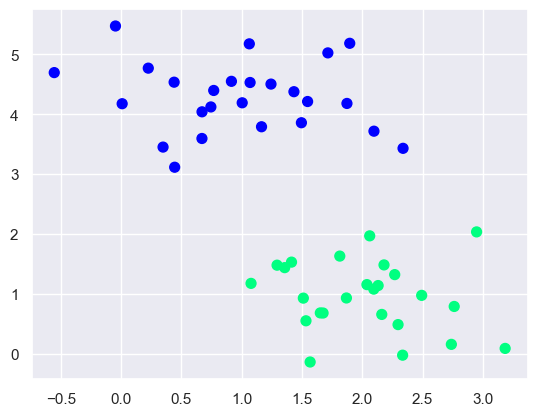

In [3]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

plt.scatter(x[:,0], x[:,1], c = y, s = 50, cmap='winter')

In [4]:
from sklearn.svm import SVC    #classifier object
model = SVC(kernel = 'linear', C = 1)
model.fit(x, y)

SVC(C=1, kernel='linear')

In [6]:
# Plotting function

def plot_svc_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for a 2-D SVC"""
    
    if ax is None:
        ax = plt.gca()  # Fetch the current axes or create new one
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolor = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

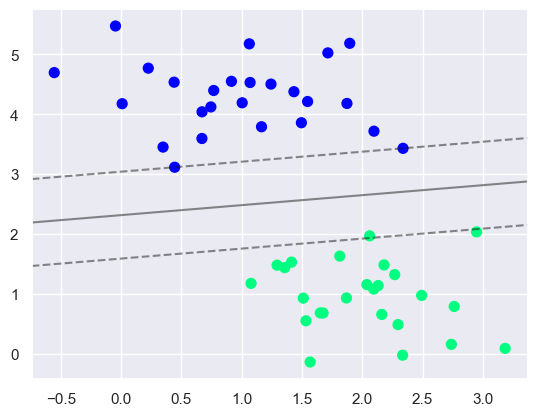

In [7]:
plt.scatter(x[:,0], x[:,1], c = y, s = 50, cmap='winter')
plot_svc_decision_function(model);

**Note**: Model doesn't change when points are added away from `support vectors`

## Almost linearly separable dataset

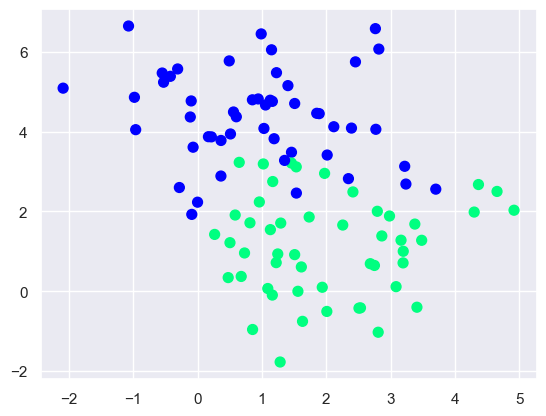

In [9]:
x,y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter(x[:,0], x[:,1], c = y, s = 50, cmap='winter')

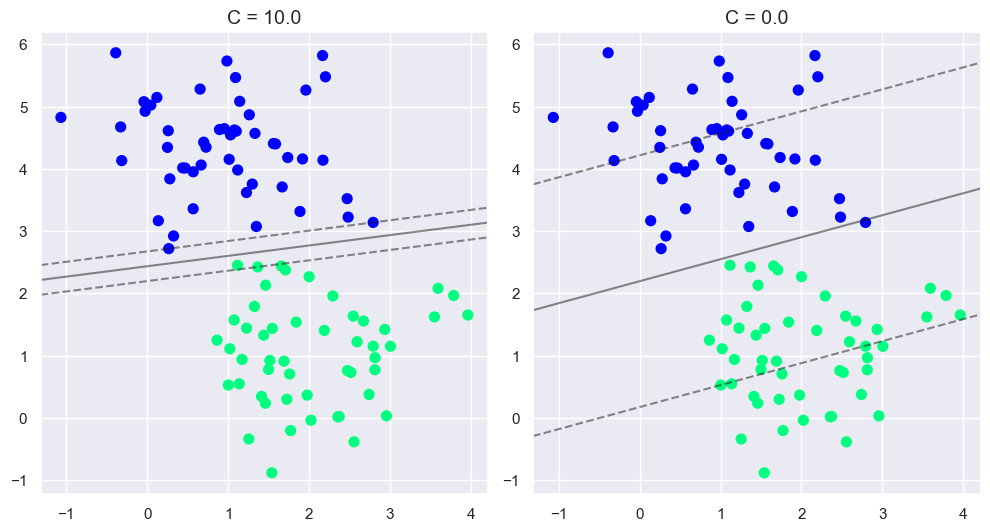

In [18]:
x,y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16,6))
fig.subplots_adjust(left = 0.0625, right = 0.65, wspace = 0.1)

for axi, C in zip(ax, [10.0, 0.008]):
    model = SVC(kernel = 'linear', C = C).fit(x,y)
    axi.scatter(x[:,0], x[:,1], c = y, s = 50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolor = 'none');
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

Note how changing `C` changes hard margins.

### Loss
- Loss is `classification` + `margin`
- `C` controls say of `classification` error in total error